In [1]:
import numpy as np
import pandas as pd

# RNA-Seq Data

First, we load the data:

In [2]:
data = pd.read_csv('normal_counts.txt', sep='\t')

In [3]:
data.head()

,gene,DLDR_0001,DLDR_0002,DLDR_0003,DLDR_0004,DLDR_0005,DLDR_0006,DLDR_0007,DLDR_0008,DLDR_0009,...,DLDR_0184,DLDR_0185,DLDR_0186,DLDR_0187,DLDR_0188,DLDR_0189,DLDR_0190,DLDR_0191,DLDR_0192,DLDR_1017
0,ENSG00000000003,5.965571,5.741587,5.996891,5.551919,6.430237,6.234619,6.071503,6.441882,5.752712,...,6.576246,6.735760,6.344234,6.608924,6.480745,6.360397,6.367705,6.604050,6.514539,6.725338
1,ENSG00000000005,1.612375,2.147793,0.418542,0.702492,1.215978,0.920810,0.458163,0.927224,1.089389,...,-1.091275,-0.942637,-0.026585,-0.757399,-1.083676,0.886550,-0.902201,-0.865036,-1.588749,-0.922976
2,ENSG00000000419,4.133821,4.120969,4.086129,4.116240,4.393797,4.390909,4.148242,4.554655,4.203819,...,4.244459,4.342765,4.179319,4.274450,4.361634,4.093280,4.148010,4.351489,3.859711,4.506480
3,ENSG00000000457,4.111056,3.922234,3.964871,3.978350,4.018235,3.864521,4.263119,3.896271,4.139546,...,4.453838,4.685598,4.438796,4.042577,4.313540,4.205119,4.506058,4.072137,4.341988,4.121418
4,ENSG00000000460,4.150662,3.732756,3.634637,3.853979,3.614220,3.500857,4.000565,4.016287,3.904500,...,3.720038,4.640011,3.814717,2.126408,3.120196,3.336802,3.982071,3.143138,2.741172,3.164486


In [4]:
# check for any missing values
data.isna().sum().sum()

0

In [5]:
# check for duplicate columns
any(data.T.duplicated())

False

In [6]:
# rename columns
data.rename(columns={'gene': 'sample', 'DLDR_1017': 'DLDR_0117'}, inplace=True) 

In [7]:
# convert data frame to correct shape
data.set_index('sample', inplace=True)
data = data.T
data.head()

sample,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000272325,ENSG00000272414,ENSG00000272442,ENSG00000272658,ENSG00000272869,ENSG00000273079,ENSG00000273173,ENSG00000273259,ENSG00000273274,ENSG00000273294
DLDR_0001,5.965571,1.612375,4.133821,4.111056,4.150662,2.975845,11.005488,4.405768,6.825329,4.221450,...,4.727229,-0.005377,1.546032,1.365460,0.691230,5.637483,-0.005377,1.675800,2.683536,-0.339797
DLDR_0002,5.741587,2.147793,4.120969,3.922234,3.732756,3.199989,10.860700,3.895350,6.453687,4.218183,...,4.210933,-0.515172,1.806756,0.935490,1.004202,5.975612,0.532134,1.555218,2.926666,0.435919
DLDR_0003,5.996891,0.418542,4.086129,3.964871,3.634637,2.949733,10.934025,4.282577,6.437658,3.736947,...,4.501859,-0.546693,1.127079,0.675699,0.943633,5.531648,-0.184123,2.391906,2.260662,-0.691083
DLDR_0004,5.551919,0.702492,4.116240,3.978350,3.853979,2.991061,10.760445,4.297722,6.710840,4.003661,...,4.770425,2.538993,1.301129,0.702492,0.431190,5.571799,-0.034474,1.639298,2.341393,0.096771
DLDR_0005,6.430237,1.215978,4.393797,4.018235,3.614220,2.836130,11.491427,4.405558,7.437655,4.377965,...,4.659126,-1.216981,0.161530,0.898496,0.085581,5.636848,-1.216981,1.974160,1.351861,-0.079478


# Meta Data

In [8]:
meta_data = pd.read_csv('meta_data.csv')
meta_data.head()

,Patient_ID,SEX,BMI_surg,Age,Run,Diabet,Simplified_class
0,DLDR_0001,Female,35.214555,55,SRR8378590,Non Diabetic,Normal
1,DLDR_0002,Female,39.421748,47,SRR8378589,Diabetic,Normal
2,DLDR_0003,Male,48.758108,46,SRR8378432,Non Diabetic,Normal
3,DLDR_0004,Female,41.822607,36,SRR8378431,Non Diabetic,Normal
4,DLDR_0005,Female,53.582192,54,SRR8378434,Non Diabetic,Normal


In [9]:
meta_data.isna().sum()

Patient_ID          0
SEX                 0
BMI_surg            0
Age                 0
Run                 0
Diabet              0
Simplified_class    0
dtype: int64

In [10]:
meta_data.Run.unique()

array(['SRR8378590', 'SRR8378589', 'SRR8378432', 'SRR8378431',
       'SRR8378434', 'SRR8378433', 'SRR8378436', 'SRR8378435',
       'SRR8378588', 'SRR8378587', 'SRR8378490', 'SRR8378489',
       'SRR8378488', 'SRR8378487', 'SRR8378494', 'SRR8378493',
       'SRR8378492', 'SRR8378491', 'SRR8378592', 'SRR8378591',
       'SRR8378571', 'SRR8378572', 'SRR8378569', 'SRR8378570',
       'SRR8378575', 'SRR8378576', 'SRR8378573', 'SRR8378574',
       'SRR8378567', 'SRR8378568', 'SRR8378538', 'SRR8378537',
       'SRR8378540', 'SRR8378539', 'SRR8378542', 'SRR8378541',
       'SRR8378544', 'SRR8378543', 'SRR8378536', 'SRR8378535',
       'SRR8378579', 'SRR8378580', 'SRR8378581', 'SRR8378582',
       'SRR8378583', 'SRR8378584', 'SRR8378585', 'SRR8378586',
       'SRR8378577', 'SRR8378578', 'SRR8378554', 'SRR8378553',
       'SRR8378552', 'SRR8378551', 'SRR8378550', 'SRR8378549',
       'SRR8378548', 'SRR8378547', 'SRR8378546', 'SRR8378545',
       'SRR8378473', 'SRR8378474', 'SRR8378471', 'SRR83

In [11]:
meta_data.Run.nunique()

192

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
meta_data.Diabet.value_counts()

Diabet
Non Diabetic    115
Diabetic         77
Name: count, dtype: int64

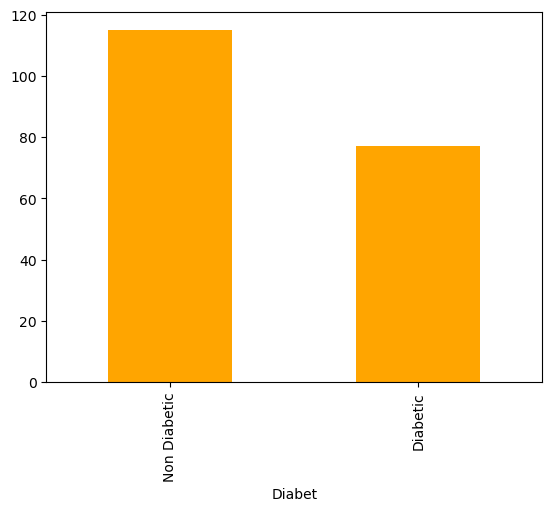

In [14]:
meta_data.Diabet.value_counts().plot(kind='bar', color='orange');
plt.savefig('diabetes_distribution.png')

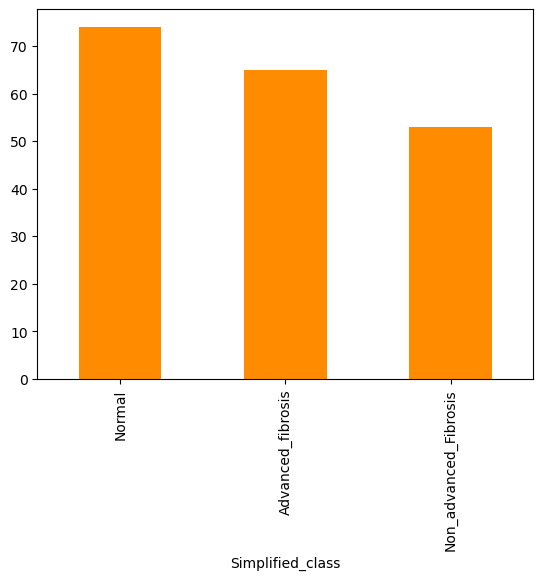

In [15]:
meta_data.Simplified_class.value_counts().plot(kind='bar', color='darkorange');
plt.savefig('classes_distribution.png')

In [16]:
meta_data.set_index('Patient_ID', inplace=True)

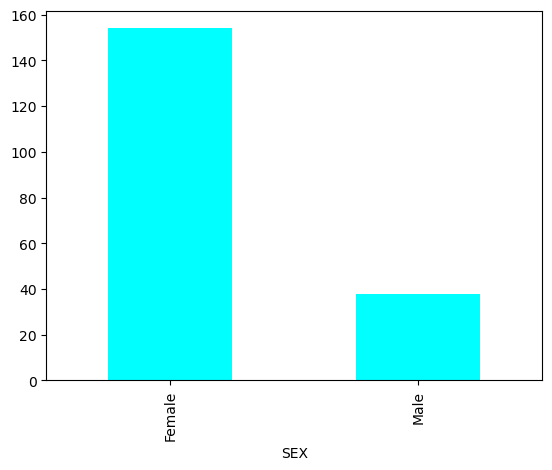

In [17]:
meta_data.SEX.value_counts().plot.bar(color='cyan');
plt.savefig('sex_distribution.png')

/home/ali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


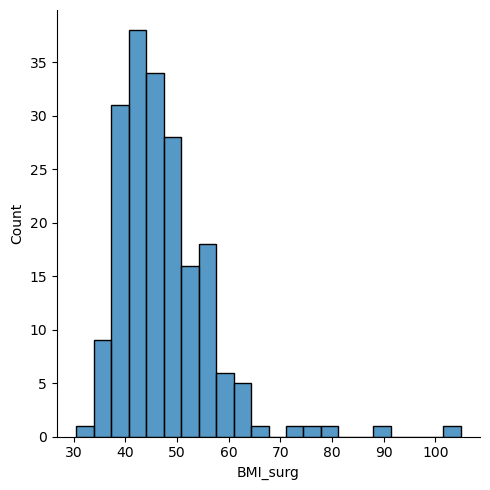

In [18]:
sns.displot(data=meta_data, x='BMI_surg');
plt.savefig('data/BMI_distribution.png')

/home/ali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


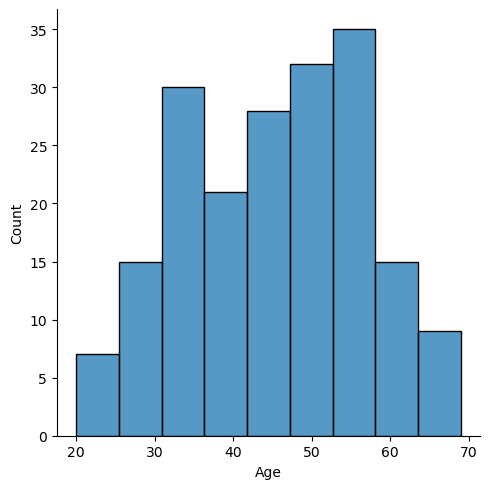

In [19]:
sns.displot(data=meta_data, x='Age');
plt.savefig('data/age_distribution.png')

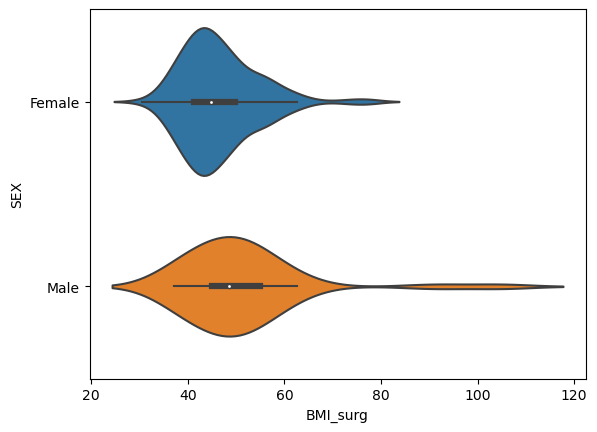

In [20]:
sns.violinplot(data=meta_data, x='BMI_surg', y='SEX');
plt.savefig('BMI_by_Sex.png')

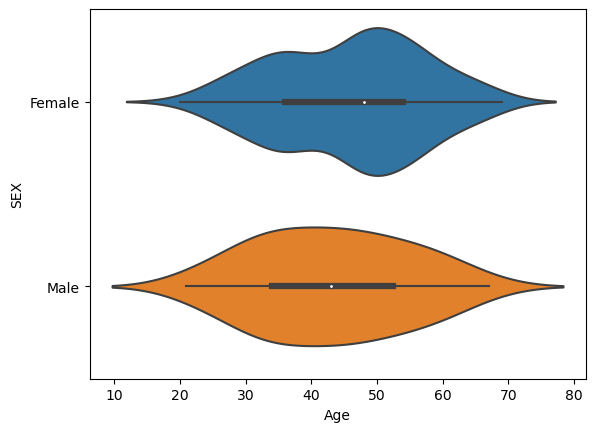

In [21]:
sns.violinplot(data=meta_data, x='Age', y='SEX');
plt.savefig('age_by_sex.png')

In [22]:
meta_data.drop(columns=['Run'], inplace=True)

# Merging RNA-Seq and Meta Data

In [23]:
whole_data = pd.merge(data, meta_data, left_index=True, right_index=True) # all data including SEX, BMI_surg, Age, Diabet
expression_data = whole_data.drop(columns=['SEX' ,'BMI_surg', 'Age', 'Diabet']) # only RNA-Seq data and the target variable

In [24]:
# save data for further analysis and modeling
whole_data.to_csv('data/whole_data.csv')
expression_data.to_csv('data/expression_data.csv')